# 7. ARCH and GARCH models

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.graphics.tsaplots as sgt #for ACF and PACF
import statsmodels.tsa.stattools as sts #for adf test

from statsmodels.tsa.arima.model import ARIMA


In [4]:
sp = pd.read_csv("data/data7_SP500.csv",
                header=0, index_col=0, na_values=".")
sp.index = pd.to_datetime(sp.index)
sp = sp.fillna(method='ffill') 
sp = sp["2013":"2022"]
sp.columns = ['price']
sp.head()

,price
DATE,
2013-03-04,1525.20
2013-03-05,1539.79
2013-03-06,1541.46
2013-03-07,1544.26
2013-03-08,1551.18


In [6]:
sp['ret'] = sp.price.pct_change()*100
sp['sqret'] = sp.ret.mul(sp.ret)   #element-wise multiplication  to get the squared returns
sp.head(3)

,price,ret,sqret
DATE,,,
2013-03-04,1525.20,NaN,NaN
2013-03-05,1539.79,0.956596,0.915076
2013-03-06,1541.46,0.108456,0.011763


<Axes: xlabel='DATE'>

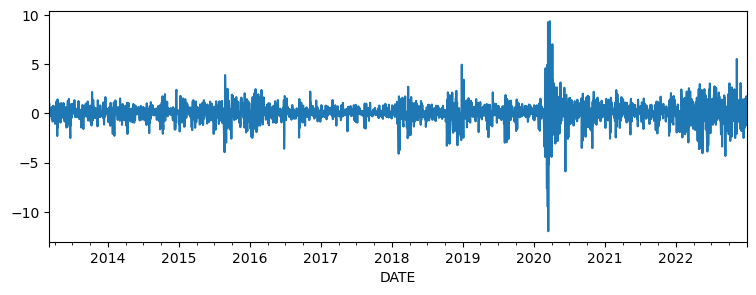

In [7]:
sp.ret.plot(figsize=(9,3))

<Axes: xlabel='DATE'>

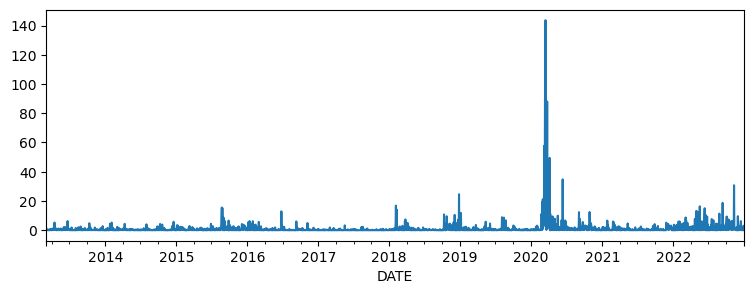

In [9]:
sp.sqret.plot(figsize=(9,3))

Text(0.5, 1.0, 'PACF for sqret')

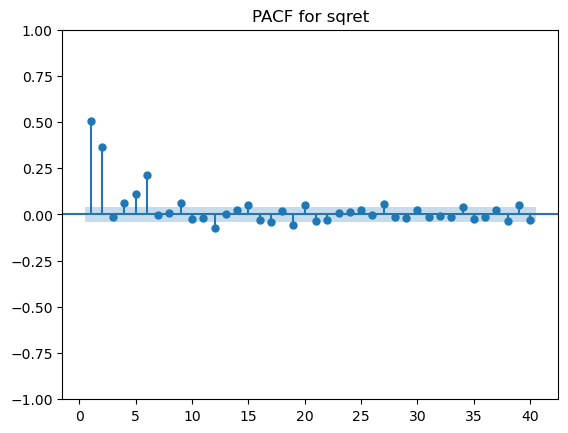

In [10]:
sgt.plot_pacf(sp.sqret[1:],lags=40,zero=False,method='ols')
plt.title('PACF for sqret')

In [11]:
pip install arch

  Obtaining dependency information for arch from https://files.pythonhosted.org/packages/24/b4/41ffe91f46eb3f49bf022c66f8768f469617329718d4246953ad3853c073/arch-6.3.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/924.1 kB ? eta -:--:--
   ---------- ----------------------------- 235.5/924.1 kB 7.3 MB/s eta 0:00:01
   --------------------------- ------------ 645.1/924.1 kB 8.1 MB/s eta 0:00:01
   ---------------------------------------  921.6/924.1 kB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 924.1/924.1 kB 6.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [12]:
from arch import arch_model

In [13]:
# specify mean eq and variance(volatility) eq
model_arch1 = arch_model(sp.ret[1:], mean='Constant',vol='ARCH',p=1)  #mean model just constant no AR or MA specified
results_arch1 = model_arch1.fit(update_freq=2)
results_arch1.summary()

Iteration:      2,   Func. Count:     14,   Neg. LLF: 5955.42762009179
Iteration:      4,   Func. Count:     27,   Neg. LLF: 3509.529653127005
Iteration:      6,   Func. Count:     34,   Neg. LLF: 3509.529526420574
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3509.5295264205392
            Iterations: 6
            Function evaluations: 34
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                    ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -3509.53
Distribution:                  Normal   AIC:                           7025.06
Method:            Maximum Likelihood   BIC:                           7042.61
                                        No. Observations:                 2564
Date:                Mon, Mar 04 2024   Df Residuals:                     2563
Time:                        16:18:40   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0972  1.891e-02      5.142  2.721e-07 [6.015e-02,  0.134]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.6056  4.262e-02     14.211  7.875e-46 [  0.522,  0.689]
alpha[1]       0.5232  8.394e-02      6.234  4.560e-10 [  0.359,  0.688]
========================================================================

Covariance estimator: robust
"""

In [14]:
model_arch = arch_model(sp.ret[1:], mean='Constant',vol='ARCH',p=7)  #mean model just constant no AR or MA specified
results_arch = model_arch.fit(update_freq=2)
results_arch.summary()

Iteration:      2,   Func. Count:     26,   Neg. LLF: 6083.548695201724
Iteration:      4,   Func. Count:     50,   Neg. LLF: 3682.6830044606813
Iteration:      6,   Func. Count:     72,   Neg. LLF: 3964.384208206405
Iteration:      8,   Func. Count:     94,   Neg. LLF: 3387.914226670022
Iteration:     10,   Func. Count:    117,   Neg. LLF: 3283.407682597045
Iteration:     12,   Func. Count:    139,   Neg. LLF: 3351.5163933937424
Iteration:     14,   Func. Count:    161,   Neg. LLF: 3187.3891696443834
Iteration:     16,   Func. Count:    183,   Neg. LLF: 3174.8578709441126
Iteration:     18,   Func. Count:    203,   Neg. LLF: 3174.8548230329316
Iteration:     20,   Func. Count:    223,   Neg. LLF: 3174.8548072293484
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3174.8548072293484
            Iterations: 20
            Function evaluations: 223
            Gradient evaluations: 20


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                    ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -3174.85
Distribution:                  Normal   AIC:                           6367.71
Method:            Maximum Likelihood   BIC:                           6420.35
                                        No. Observations:                 2564
Date:                Mon, Mar 04 2024   Df Residuals:                     2563
Time:                        16:23:56   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0810  1.414e-02      5.728  1.018e-08 [5.329e-02,  0.109]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.1915  2.584e-02      7.412  1.244e-13      [  0.141,  0.242]
alpha[1]       0.1990  4.608e-02      4.319  1.570e-05      [  0.109,  0.289]
alpha[2]       0.1660  3.171e-02      5.236  1.642e-07      [  0.104,  0.228]
alpha[3]       0.1750  3.651e-02      4.792  1.648e-06      [  0.103,  0.247]
alpha[4]       0.1518  4.455e-02      3.407  6.579e-04    [6.445e-02,  0.239]
alpha[5]       0.0612  2.602e-02      2.352  1.868e-02    [1.020e-02,  0.112]
alpha[6]       0.0868  2.865e-02      3.029  2.456e-03    [3.062e-02,  0.143]
alpha[7]       0.0295  2.321e-02      1.273      0.203 [-1.595e-02,7.504e-02]
=============================================================================

Covariance estimator: robust
"""

In [15]:
model_arch1 = arch_model(sp.ret[1:], mean='AR',lags=[1,2],vol='ARCH',p=2)  #mean eq is AR(2) --> "AR(2)ARCH(2) model"
results_arch1 = model_arch1.fit(update_freq=2)
results_arch1.summary()

Iteration:      2,   Func. Count:     19,   Neg. LLF: 2345846.5069509787
Iteration:      4,   Func. Count:     40,   Neg. LLF: 4157289.540611948
Iteration:      6,   Func. Count:     58,   Neg. LLF: 3358.3495514926512
Iteration:      8,   Func. Count:     74,   Neg. LLF: 3339.418816055104
Iteration:     10,   Func. Count:     88,   Neg. LLF: 3339.3471393715627
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3339.3471393717155
            Iterations: 10
            Function evaluations: 88
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - ARCH Model Results                            
==============================================================================
Dep. Variable:                    ret   R-squared:                       0.006
Mean Model:                        AR   Adj. R-squared:                  0.005
Vol Model:                       ARCH   Log-Likelihood:               -3339.35
Distribution:                  Normal   AIC:                           6690.69
Method:            Maximum Likelihood   BIC:                           6725.79
                                        No. Observations:                 2562
Date:                Mon, Mar 04 2024   Df Residuals:                     2559
Time:                        16:27:16   Df Model:                            3
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
Const           0.0788  1.784e-02      4.419  9.915e-06    [4.386e-02,  0.114]
ret[1]     -7.8584e-03  3.818e-02     -0.206      0.837 [-8.269e-02,6.697e-02]
ret[2]          0.0450  4.775e-02      0.943      0.346   [-4.855e-02,  0.139]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.3965  3.302e-02     12.009  3.199e-33 [  0.332,  0.461]
alpha[1]       0.3519  5.527e-02      6.367  1.933e-10 [  0.244,  0.460]
alpha[2]       0.3398  4.994e-02      6.803  1.024e-11 [  0.242,  0.438]
========================================================================

Covariance estimator: robust
"""

In [16]:
model_arch1 = arch_model(sp.ret[1:], mean='Constant',vol='GARCH',p=1,q=1)  #mean eq is AR(2) --> "GARCH(1,1) model"
results_arch1 = model_arch1.fit(update_freq=2)
results_arch1.summary()

Iteration:      2,   Func. Count:     17,   Neg. LLF: 14688.555817198752
Iteration:      4,   Func. Count:     34,   Neg. LLF: 3218.779017597559
Iteration:      6,   Func. Count:     47,   Neg. LLF: 3167.101548346207
Iteration:      8,   Func. Count:     57,   Neg. LLF: 3167.0946377054784
Iteration:     10,   Func. Count:     66,   Neg. LLF: 3167.0946264404274
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3167.0946264404756
            Iterations: 10
            Function evaluations: 66
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                    ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3167.09
Distribution:                  Normal   AIC:                           6342.19
Method:            Maximum Likelihood   BIC:                           6365.59
                                        No. Observations:                 2564
Date:                Mon, Mar 04 2024   Df Residuals:                     2563
Time:                        16:31:08   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0797  1.397e-02      5.706  1.158e-08 [5.232e-02,  0.107]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0387  8.960e-03      4.322  1.544e-05 [2.117e-02,5.629e-02]
alpha[1]       0.2042  3.078e-02      6.634  3.257e-11     [  0.144,  0.265]
beta[1]        0.7662  2.803e-02     27.336 1.590e-164     [  0.711,  0.821]
============================================================================

Covariance estimator: robust
"""

In [18]:
model_arch1 = arch_model(sp.ret[1:], mean='Constant',vol='GARCH',p=2,q=1)  #mean eq is AR(2) --> "GARCH(2,1) model"
results_arch1 = model_arch1.fit(update_freq=2)
results_arch1.summary()

Iteration:      2,   Func. Count:     18,   Neg. LLF: 12710.575532328674
Iteration:      4,   Func. Count:     37,   Neg. LLF: 4304.552286473422
Iteration:      6,   Func. Count:     51,   Neg. LLF: 3170.164498869722
Iteration:      8,   Func. Count:     65,   Neg. LLF: 3192.3370445114133
Iteration:     10,   Func. Count:     79,   Neg. LLF: 3167.001998849769
Iteration:     12,   Func. Count:     91,   Neg. LLF: 3167.000194894681
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3167.000194894681
            Iterations: 13
            Function evaluations: 96
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                    ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3167.00
Distribution:                  Normal   AIC:                           6344.00
Method:            Maximum Likelihood   BIC:                           6373.25
                                        No. Observations:                 2564
Date:                Mon, Mar 04 2024   Df Residuals:                     2563
Time:                        16:33:50   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0794  1.391e-02      5.710  1.132e-08 [5.217e-02,  0.107]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0403  1.069e-02      3.770  1.632e-04 [1.936e-02,6.127e-02]
alpha[1]       0.1961  4.522e-02      4.336  1.454e-05     [  0.107,  0.285]
alpha[2]       0.0156  5.492e-02      0.283      0.777  [-9.207e-02,  0.123]
beta[1]        0.7578  3.861e-02     19.626  9.319e-86     [  0.682,  0.834]
============================================================================

Covariance estimator: robust
"""

### Out of sample forecasting

In [21]:
df = pd.read_csv("data/data6_GDP_Q_real_SA.csv", header=0,index_col=0)
df.index = pd.to_datetime(df.index)
df=df['1970':'2019']
df.columns = ['gdp']
df['gdpgr']=df.gdp.pct_change()*100
df.head()

,gdp,gdpgr
DATE,,
1970-01-01,4939.759,NaN
1970-04-01,4946.770,0.141930
1970-07-01,4992.357,0.921551
1970-10-01,4938.857,-1.071638
1971-01-01,5072.996,2.715993


In [24]:
model_gdp = ARIMA(df.gdp, order=(1,1,1))  #ARIMA(1,1,1) model
results_gdp = model_gdp.fit()
results_gdp.summary()

C:\Users\soyyo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\soyyo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\soyyo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    gdp   No. Observations:                  200
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1133.803
Date:                Mon, 04 Mar 2024   AIC                           2273.607
Time:                        16:42:44   BIC                           2283.486
Sample:                    01-01-1970   HQIC                          2277.605
                         - 10-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9403      0.032     29.056      0.000       0.877       1.004
ma.L1         -0.5901      0.065     -9.053      0.000      -0.718      -0.462
sigma2      5176.8765    385.449     13.431      0.000    4421.410    5932.343
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                62.40
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               1.55   Skew:                            -0.52
Prob(H) (two-sided):                  0.08   Kurtosis:                         5.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
model_gdp = ARIMA(df.gdp, order=(2,1,1))  #ARIMA(2,1,1) model
results_gdp = model_gdp.fit()
results_gdp.summary()

C:\Users\soyyo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\soyyo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\soyyo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    gdp   No. Observations:                  200
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1129.573
Date:                Mon, 04 Mar 2024   AIC                           2267.147
Time:                        16:46:17   BIC                           2280.320
Sample:                    01-01-1970   HQIC                          2272.478
                         - 10-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3495      0.063     21.268      0.000       1.225       1.474
ar.L2         -0.3500      0.063     -5.573      0.000      -0.473      -0.227
ma.L1         -0.9750      0.024    -40.785      0.000      -1.022      -0.928
sigma2      4930.5269    351.834     14.014      0.000    4240.945    5620.109
===================================================================================
Ljung-Box (L1) (Q):                   0.82   Jarque-Bera (JB):               139.49
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               1.51   Skew:                            -0.87
Prob(H) (two-sided):                  0.10   Kurtosis:                         6.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
train = df.gdp[:180]   #0~179 data
test = df.gdp[180:]

In [27]:
model_gdp = ARIMA(train, order=(2,1,1))  #ARIMA(2,1,1) model using the training sample for forecasting 
results_gdp = model_gdp.fit()

C:\Users\soyyo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\soyyo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\soyyo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [28]:
fc = results_gdp.get_forecast(steps=20, alpha=0.05).summary_frame()
fc.head()   #Forecasts

C:\Users\soyyo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


gdp,mean,mean_se,mean_ci_lower,mean_ci_upper
2015-01-01,17214.853346,72.887817,17071.995851,17357.710841
2015-04-01,17287.390718,123.579957,17045.178453,17529.602983
2015-07-01,17359.511675,165.969708,17034.217024,17684.806326
2015-10-01,17431.446298,202.642641,17034.274019,17828.618576
2016-01-01,17503.274270,235.425265,17041.849229,17964.699311


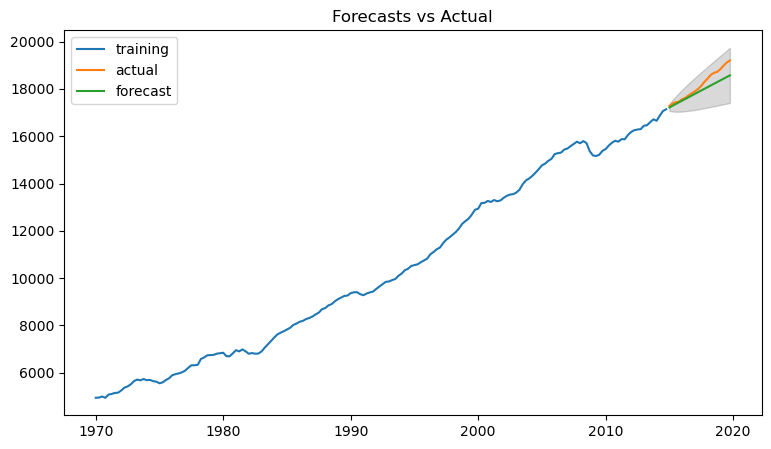

In [31]:
plt.figure(figsize=(9,5))
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc['mean'],label='forecast')
plt.fill_between(fc.index, fc.mean_ci_lower,fc.mean_ci_upper, color='k',alpha=0.15)  #confidence shade
plt.title('Forecasts vs Actual')
plt.legend(loc='upper left', fontsize=10)

In [32]:
def forecast_accuracy(forecast, actual):
    me = np.mean(forecast-actual)
    mae = np.mean(np.abs(forecast-actual))
    mpe = np.mean((forecast-actual)/actual)
    mape = np.mean(np.abs(forecast-actual)/np.abs(actual))
    rsme = np.mean((forecast-actual)**2)**.5
    
    return({'me':me,'mae':mae,'mpe':mpe,'mape':mape,'rsme':rsme})

In [34]:
forecast_accuracy(fc['mean'], test.values)

{'me': -261.8841798957168,
 'mae': 261.8841798957168,
 'mpe': -0.014071962192111773,
 'mape': 0.014071962192111773,
 'rsme': 333.03789247915347}